## Analysis and Prediction for The Chronic Kidney Disease Dataset


### Project Definition
#### Project Overview
Chronic kidney disease or (CKD) is a type of kidney disease in which there is gradual loss of kidney function over a period of months to years[1].in 2016 ,This disease had affected 753 million people globally: 417 million females and 336 million males.[2] In order to take a closer look to this disease, in 2015 for nearly 2 months I. Jerlin Rubini a research scholar and Dr. P. Soundarapandian a Senior Consultant Nephrologist have collected and created a data set containing information of 400 Indian patients and their diagnosis.

#### Problem Statement
In this post I will try to answer the following Questions:
Can we predict kidney disease illness given a limited and unclean sample of patines information?
And what are the best features that can help predict Chronic kidney disease?
To answer these questions I need to go through a number of steps:
1. Examining the data set.
2. Clean the data form missing or unwanted values.
3. Prepare the data to be used in the prediction model by changing data type or removing outliers.
4. Build a prediction model and train the data.
5. Examine the results and draw a conclusion.

My main objective is to build a good model that is able to predict if a certain patient has the disease or not.

### Methodology
#### Data Preprocessing
To prepare the data for the classification algorithm, I have don the fellowing steps:
1. Import the necessary libraries to read, manipulate and visualize the data
2. Read data and convert missing information represented by ‘?’ to np.na.
3. Remove missing values.
4. Examine the values of each column to remove irregularities if exists
5. Change the values of the binary categorical columns to be 0 and 1.
6. Change the packed_cell_Volume column data type from string to integer.


In [66]:
import numpy as np 
import pandas as pd #
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [67]:
#read data and remove missing information

kidney_disease = pd.read_csv("chronic_kidney_disease.csv",na_values=['?'])
kidney_disease.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Suger,Red_Blood_Cells,Pus_Cell,Pus_Cell_clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Analysis
#### Data Exploration
The dataset used in this blog was downloaded from UCI ML Repository. The data was donated in 2015 from an Apollo Hospitals in Indian and it has 400 entry, which is a very small dataset considering it has number of missing values. There are 25 features related to the patient symptoms, some of which numeric(11) and other nominal(14). I should mention here that this dataset has a class imbalance with 150 cases has the disease and 250 does not.

In [68]:
#explore data
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
Age                        391 non-null float64
Blood_Pressure             388 non-null float64
Specific_Gravity           353 non-null float64
Albumin                    354 non-null float64
Suger                      351 non-null float64
Red_Blood_Cells            248 non-null object
Pus_Cell                   335 non-null object
Pus_Cell_clumps            396 non-null object
Bacteria                   396 non-null object
Blood_Glucose_Random       356 non-null float64
Blood_Urea                 381 non-null float64
Serum_Creatinine           383 non-null float64
Sodium                     313 non-null float64
Potassium                  312 non-null float64
Hemoglobin                 348 non-null float64
Packed_Cell_Volume         330 non-null object
White_Blood_Cell_Count     295 non-null object
Red_Blood_Cell_Count       270 non-null object
Hypertension               398 non-nul

In [69]:
kidney_disease.isna().sum()

Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Suger                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          70
White_Blood_Cell_Count     105
Red_Blood_Cell_Count       130
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Class                        0
dtype: int64

In [70]:
#remove columes with more the 150 missing values then remove nas from rows
kidney_disease = kidney_disease.drop(['Red_Blood_Cells','White_Blood_Cell_Count','Red_Blood_Cell_Count'],1)

In [71]:
kidney_disease.dropna(inplace= True)

In [72]:
#examine the values of each column to remove irregularities if exists
kidney_columns = kidney_disease.columns
for col in kidney_columns:
    print(col + ':', kidney_disease[col].unique())

Age: [48. 68. 53. 63. 40. 60. 61. 75. 69. 73. 76. 47. 54. 15. 46. 56. 67. 74.
 59. 71. 65. 17. 45. 70. 52. 50. 39. 55. 62. 66. 83. 21. 42. 64.  6. 49.
 90. 34. 57. 23. 51. 38. 35. 30. 25. 19. 24. 20. 33. 41. 44. 29. 43. 58.
 32. 37. 22. 28. 72. 79. 80. 36. 12.]
Blood_Pressure: [ 70.  90.  80. 100.  60.  50. 110.]
Specific_Gravity: [1.005 1.01  1.02  1.015 1.025]
Albumin: [4. 0. 2. 3. 1.]
Suger: [0. 1. 2. 3. 4. 5.]
Pus_Cell: ['abnormal' 'normal']
Pus_Cell_clumps: ['present' 'notpresent']
Bacteria: ['notpresent' 'present']
Blood_Glucose_Random: [117. 100.  70. 380. 208. 157.  76. 263. 173.  95. 108. 156. 264. 107.
 159.  92. 204. 207. 124. 162. 253.  86. 150. 360. 163. 129. 133. 102.
 132. 280. 210. 219. 295.  93.  91.  88. 115. 123. 294. 144. 118. 224.
 128. 214. 268. 105. 288. 121. 273. 242. 122. 424. 303. 160. 447.  22.
 131. 352. 239.  94. 252. 139. 172. 109. 255.  78. 490. 241. 104. 165.
 169. 463. 106. 176. 140.  82. 119.  99.  98.  97. 111.  96. 125. 112.
 130.  81.  89. 127. 137.

In [74]:
#change the values of the binary categorical columns to be 0 and 1.
kidney_disease['Pus_Cell'].replace(['abnormal','normal'],[1,0],inplace= True)
kidney_disease['Pus_Cell_clumps'].replace(['present','notpresent'],[1,0],inplace= True)
kidney_disease['Bacteria'].replace(['present','notpresent'],[1,0],inplace= True)
kidney_disease['Hypertension'].replace(['yes','no'],[1,0],inplace= True)
kidney_disease['Diabetes_Mellitus'].replace(['yes','no'],[1,0],inplace= True)
kidney_disease['Coronary_Artery_Disease'].replace(['yes','no'],[1,0],inplace= True)
kidney_disease['Appetite'].replace(['good','poor'],[1,0],inplace= True)
kidney_disease['Pedal_Edema'].replace(['yes','no'],[1,0],inplace= True)
kidney_disease['Anemia'].replace(['yes','no'],[1,0],inplace= True)
kidney_disease['Class'].replace(['ckd','notckd'],[1,0],inplace= True)

In [78]:
# the packed_cell_Volume data type need to be changed from sring to integer 
kidney_disease.Packed_Cell_Volume = kidney_disease.Packed_Cell_Volume.astype(str).astype(int)

#### Data Visualization

In [75]:
#Line plot
kidney = kidney_disease.copy()
kidney["id"]=range(1,(len(kidney.Bacteria)+1),1)
kidney["kidney_bp_norm"]=(kidney.Blood_Pressure-np.min(kidney.Blood_Pressure))/(np.max(kidney.Blood_Pressure)-np.min(kidney.Blood_Pressure))
kidney["kidney_hemo_norm"]=(kidney.Hemoglobin-np.min(kidney.Hemoglobin))/(np.max(kidney.Hemoglobin)-np.min(kidney.Hemoglobin))
#Line Plot
trace1 = go.Scatter(
        x = kidney.id,
        y = kidney.kidney_bp_norm,
        mode = "lines",
        name = "Blood Press.",
        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
        text= kidney_disease.Age)
trace2 = go.Scatter(
        x = kidney.id,
        y = kidney.kidney_hemo_norm,
        mode = "lines+markers",
        name = "Hemoglobin",
        marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
        text= kidney_disease.Age)
data=[trace1,trace2]
layout=dict(title="Blood Pressure and Hemoglobin values according the age",
            xaxis=dict(title="İd",ticklen=5,zeroline=False))
fig=dict(data=data,layout=layout)
iplot(fig)

As illustrated here, there is no real correlation between the age and blood pressure and hemoglobin level.

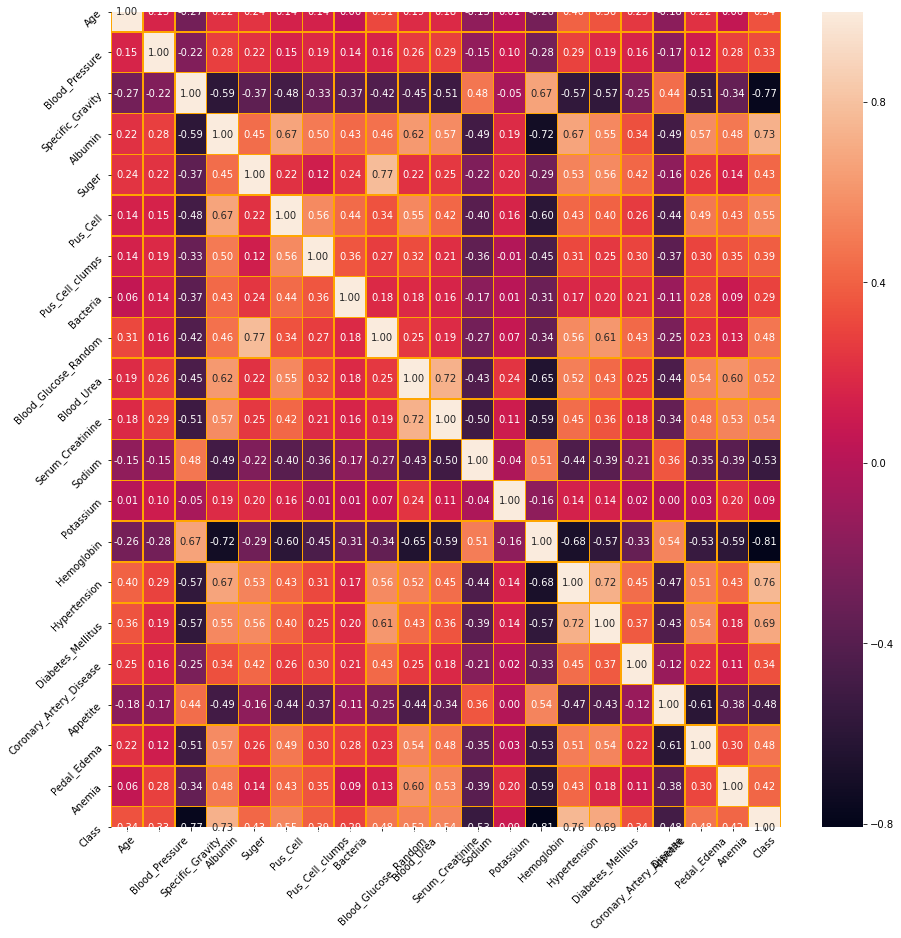

In [76]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(kidney_disease.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

This heat map gives us a good look on how the features are related to each other. for example we can see that there is no relation between age and appetite ( dark colour), but there is a strong relation between the blood glucose level and sugre (light colour).

In [77]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 3 to 399
Data columns (total 22 columns):
Age                        209 non-null float64
Blood_Pressure             209 non-null float64
Specific_Gravity           209 non-null float64
Albumin                    209 non-null float64
Suger                      209 non-null float64
Pus_Cell                   209 non-null int64
Pus_Cell_clumps            209 non-null int64
Bacteria                   209 non-null int64
Blood_Glucose_Random       209 non-null float64
Blood_Urea                 209 non-null float64
Serum_Creatinine           209 non-null float64
Sodium                     209 non-null float64
Potassium                  209 non-null float64
Hemoglobin                 209 non-null float64
Packed_Cell_Volume         209 non-null object
Hypertension               209 non-null int64
Diabetes_Mellitus          209 non-null int64
Coronary_Artery_Disease    209 non-null int64
Appetite                   209 non-null int6

#### Implementation
To use a classification algorithm I need to:
1. Split data in to label (for the the class) and features (for the rest of the columns).
2. Create train and test sets.
3. Train the model.
I tested 2 classification algorithms to compare their performance.
1. GaussianNB: as its preform well with binary classifications.
2. RandomForestClassifier: takes the average of all the predictions so it does not suffer from the overfitting problem.


#### Metrics
I used two matrices to evaluate the model:
1. Accuracy: As we have a binary classification problem (whether you have the disease or not),true positive and true negatives are important to focus on and accuracy is the metric that highlights their importance.
2. F-Score: Class imbalance and uneven distribution are problems that exist in this dataset, so F-Score is a good metric to be used with this kind of problem.

In [79]:
# split data in to label (for the the class) and features (for the rest of the columns) 
features = kidney_disease.drop(['Class'], axis = 1)
label = kidney_disease['Class']

In [80]:
#create train and test sets 
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size = 0.2, 
                                                    random_state = 47)

In [81]:
#Train the GaussianNB
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
model_NB = clf_NB.fit(X_train,y_train)
predictions_NB = clf_NB.predict(X_test)
accuracy_NB =accuracy_score(y_test, predictions_NB)
fscore_NB=fbeta_score(y_test, predictions_NB,beta = 0.5)

In [82]:
accuracy_NB

1.0

In [83]:
fscore_NB

1.0

In [87]:
#Train the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
model_RF = clf_RF.fit(X_train,y_train)
predictions_RF = clf_RF.predict(X_test)
accuracy_RF =accuracy_score(y_test, predictions_RF)
fscore_RF=fbeta_score(y_test, predictions_RF,beta = 0.5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [88]:
accuracy_RF

1.0

In [89]:
fscore_RF

1.0

Both algorithms preformed very well with 100% accuracy and F- Score = 1. as a result no need for improvement upon algorithm parameters.


### Results
#### Model Evaluation and Validation
To answer my second question stated earlier:
"what are the best features that can help predict Chronic kidney disease?"
I used the feature_importances_ function and the three most importance features that can help in prediction are : Packed_Cell_Volume, Serum_Creatinine, Specific_Gravity.

In [95]:
#feature_importances
importances = model_RF.feature_importances_
X_features = features.columns
list_of_importances = list(zip(X_features, model_RF.feature_importances_))

In [96]:
importances = pd.DataFrame(model_RF.feature_importances_,
                                   index = features.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
importances[0:3]

,importance
Packed_Cell_Volume,0.310794
Serum_Creatinine,0.253812
Specific_Gravity,0.175596


Although the dataset is really small and has a lot of missing values, I did not want to use technics as Imputing because, in my opinion, as I’m working with medical information I prefer to have limited data than inaccurate or not exact one to reduce the chances of miss diagnosis.


### Conclusion
#### Reflection
In this blog, there were 400 samples and 26 parameters. However, I encountered many issues like class imbalance, missing values and the size of the dataset in hand. So, I went through number of steps to prepare the data for the classification process and I was able to build my model successfully.
#### Improvement
I would like to test the robustness of the model if used in real life sitting by implementing an application that can be used in real life.

### References
[1] National Institute of Diabetes and Digestive and Kidney Diseases. June 2017. Retrieved 19 December 2017.

[2] Bikbov B, Perico N, Remuzzi G (23 May 2018). "Disparities in Chronic Kidney Disease Prevalence among Males and Females in 195 Countries: Analysis of the Global Burden of Disease 2016 Study". Nephron. 139 (4): 313–318. 